# **Instrument to Instrument (ITI) translation: Kanzelhoehe Solar Observatory (KSO)**


## Read The Docs
For more information about the tool and background of the individual case studies see:

[iti-documentation.rtfd.io](https://iti-documentation.readthedocs.io/en/latest/)

## Installation

In [1]:
!pip install git+https://github.com/spaceml-org/InstrumentToInstrument.git@development
!pip install lightning
!pip install sunpy_soar
!pip install sunpy

  Cloning https://github.com/spaceml-org/InstrumentToInstrument.git (to revision development) to /private/var/folders/tj/7h3lqn950sv5k36g1yyl4vkr0000gn/T/pip-req-build-g1fzdfhg
  Running command git clone --filter=blob:none --quiet https://github.com/spaceml-org/InstrumentToInstrument.git /private/var/folders/tj/7h3lqn950sv5k36g1yyl4vkr0000gn/T/pip-req-build-g1fzdfhg
  Running command git checkout -b development --track origin/development
  Switched to a new branch 'development'
  Branch 'development' set up to track remote branch 'development' from 'origin'.
  Resolved https://github.com/spaceml-org/InstrumentToInstrument.git to commit b083c705d463997caebf2df663d8774cbe569eda
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1

## Imports

In [7]:
from iti.translate import *
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import warnings
warnings.filterwarnings('ignore')
os.makedirs('samples', exist_ok=True)

base_path = os.getcwd()

We select a random observation with quality degradataions from the KSO data archive.

# KSO degraded to corrected observation

## Download data

In [ ]:
kso_path = 'samples/kso.fits'
urlretrieve('http://cesar.kso.ac.at/halpha3a/2013/20130111/processed/kanz_halph_fi_20130111_084223.fts.gz', kso_path)

The Kanzelhohe Solar Observatory (KSO) provides ground-based Halpha observations at high-cadence. The effect of atmospheric degradations can be mitiageted by ITI. This notebook demonstrates the translation from distorted Halpha observations to observations showing no atmospheric distortions.

We initialize the translator class for the ITI translation.

In [10]:
translator = KSOLowToHigh()

For ground-based observations we first apply a correction of the center-to-limb varaition. In order to compare the pre-processed observations to the ITI enhanced observations we can request the numpy arrays by ``setting return_arrays=True``.

In [11]:
(_, kso, iti_kso) = list(translator.translate([kso_path], return_arrays=True))[0]

We assert the correction of the extended cloud at full-disk level.

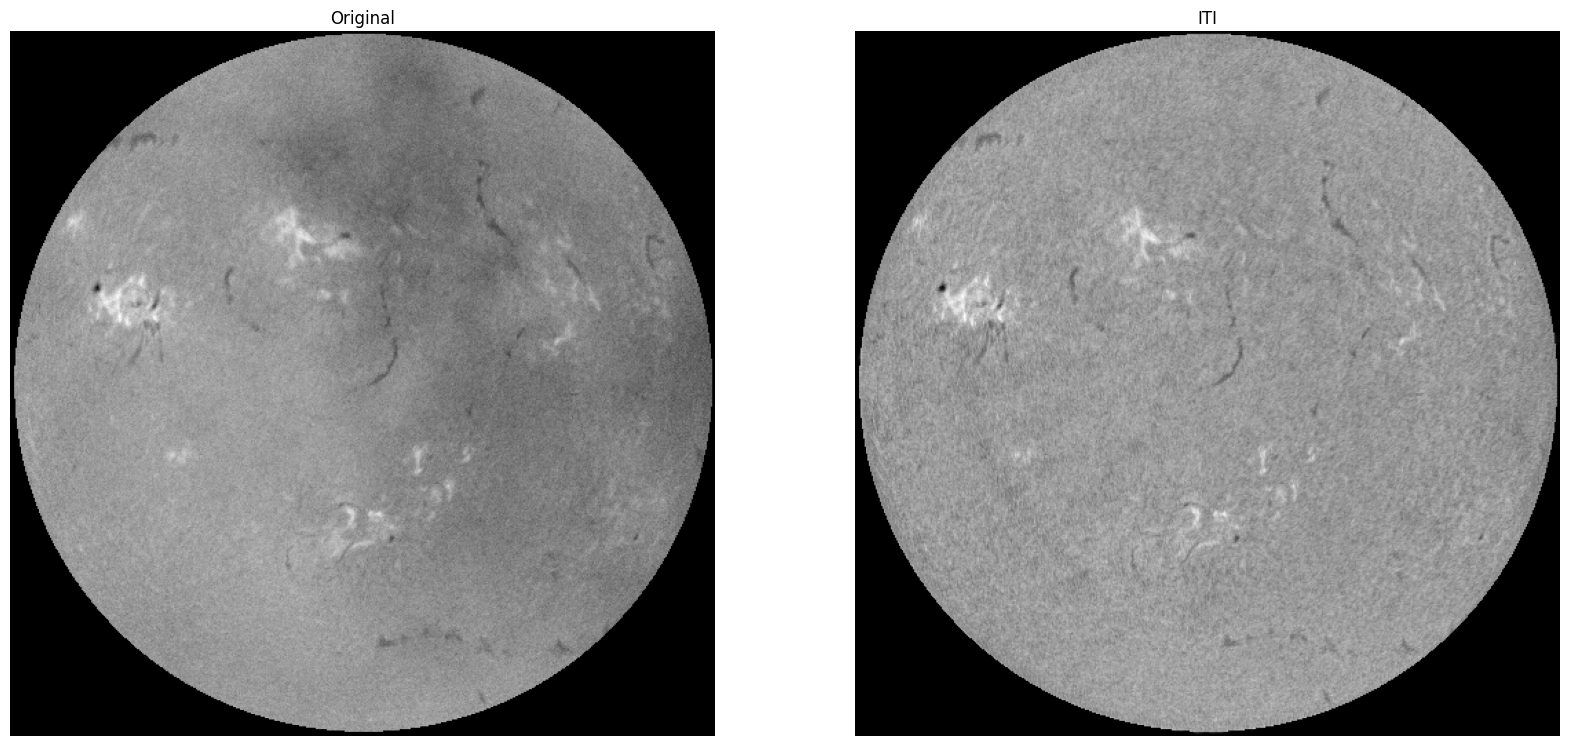

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(kso[0], cmap='gray', origin='lower', )
axs[0].set_axis_off()
axs[0].set_title('Original')
axs[1].imshow(iti_kso[0], cmap='gray', origin='lower')
axs[1].set_axis_off()
axs[1].set_title('ITI')
plt.show()

# KSO film-to-CCD

KSO provides Halpha observations dating back to 1973. We can use ITI to restore the scanned photographic film observations in the qualtiy of the recent instrument.

We start by downloading a random observation from the archive (note that some observations are too strong degraded to recover them with ITI).

In [13]:
film_path = 'samples/film.fits'
urlretrieve('http://cesar.kso.ac.at/hafilma/1980/19800110/processed/1240457_Ha19800110_131058.fts.gz', film_path)

('samples/film.fits', <http.client.HTTPMessage at 0x7ff6e692b160>)

We initialize the translator class an perform the translation

In [14]:
translator = KSOFilmToCCD()
(_, film, iti_film) = list(translator.translate([film_path], return_arrays=True))[0]

We compare both images. Note that the solar limb is not always correctly detected, which can lead to wrong interpretations by ITI.

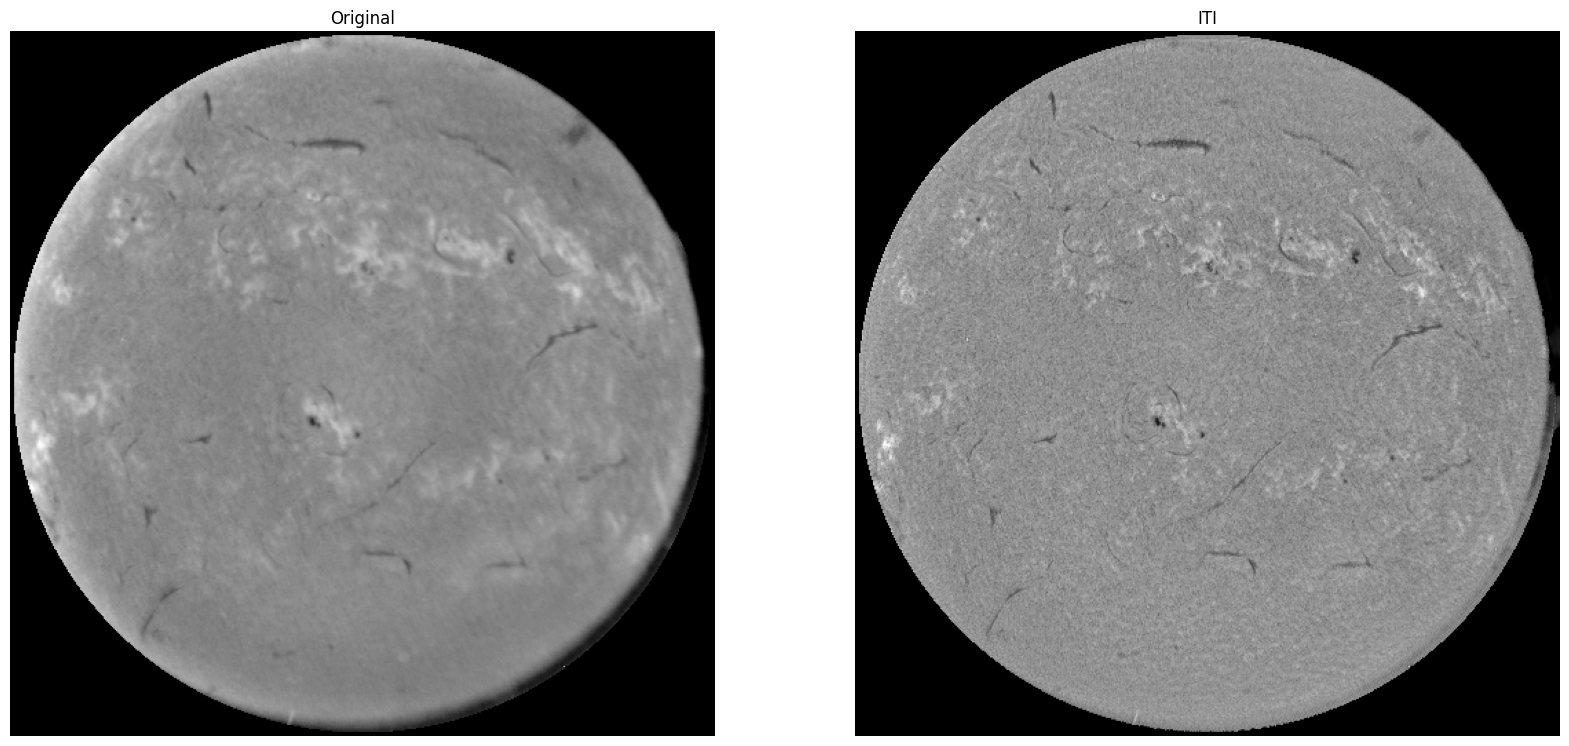

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(film[0], cmap='gray', origin='lower')
axs[0].set_axis_off()
axs[0].set_title('Original')
axs[1].imshow(iti_film[0], cmap='gray', origin='lower')
axs[1].set_axis_off()
axs[1].set_title('ITI')
plt.show()